## CiFAR 이미지 분류 모델 구현
- 데이터 : https://www.cs.toronto.edu/~kriz/cifar.html
- 학습방법 : 10가지 이미지 종류 분류 => 다중 분류
- 이미지 : DNN, CNN

## [1] 데이터 로딩

In [1]:
import tensorflow as tf

In [56]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential                       # 모델 객체
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,   # 레이어 객체
from tensorflow.keras.datasets.cifar10 import load_data
# 그래픽화 모듈 로딩
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
cifar = tf.keras.datasets.cifar10.load_data()

In [88]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

In [89]:
train_input = cifar[0][0]
train_target = cifar[0][1]
test_input = cifar[1][0]
test_target = cifar[1][1]

In [90]:
train_input.shape, train_target.shape

((50000, 32, 32, 3), (50000, 1))

## [2] 데이터 전처리

### 데이터 나누기

In [91]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, 
                                                                    test_size=0.2, random_state=11,
                                                                    stratify=train_target)

In [92]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
train_input = train_input/255.0 # numpy 브로드캐스팅
val_input = val_input/255.0
test_input = test_input/255.0

In [93]:
train_input = train_input.reshape(-1, 32, 32, 3)
test_input = test_input.reshape(-1, 32, 32, 3)
val_input = val_input.reshape(-1, 32, 32, 3)

In [94]:
train_input.shape, test_input.shape, val_input.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

## [3] 모델 생성

In [102]:
model = Sequential()

In [103]:
model.add(Conv2D(10, kernel_size=3, padding='same', input_shape=(32,32,3)))
model.add(MaxPool2D())
model.add(Conv2D(10, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(10, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(50, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 10)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 10)        

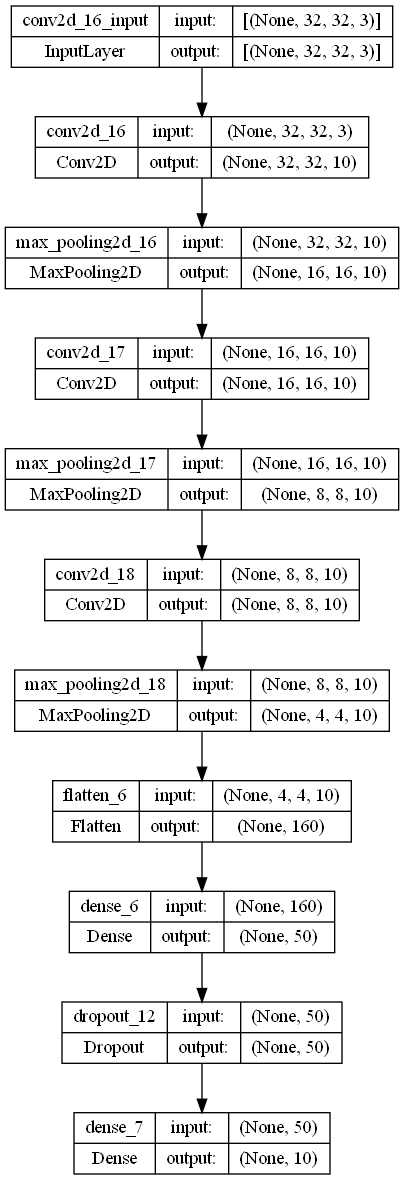

In [105]:
plot_model(model, show_shapes=True)

In [106]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## [4] 모델 학습

In [107]:
model.fit(train_input, train_target,epochs=30,validation_data=(val_input,val_target),validation_batch_size=50)

Epoch 1/30
1250/1250 [==============================] - 14s 11ms/step - loss: 2.1074 - accuracy: 0.2308 - val_loss: 1.9530 - val_accuracy: 0.3105
Epoch 2/30
1250/1250 [==============================] - 12s 10ms/step - loss: 1.9277 - accuracy: 0.2932 - val_loss: 1.7881 - val_accuracy: 0.3848
Epoch 3/30
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8059 - accuracy: 0.3458 - val_loss: 1.6893 - val_accuracy: 0.4190
Epoch 4/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.7150 - accuracy: 0.3853 - val_loss: 1.5771 - val_accuracy: 0.4696
Epoch 5/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6475 - accuracy: 0.4099 - val_loss: 1.4906 - val_accuracy: 0.5027
Epoch 6/30
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5973 - accuracy: 0.4274 - val_loss: 1.4479 - val_accuracy: 0.5269
Epoch 7/30
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5503 - accuracy: 0.4451 - val_loss: 1.3978 -

In [108]:
model.evaluate(val_input,val_target)

313/313 [==============================] - 2s 5ms/step - loss: 1.1303 - accuracy: 0.6150


[1.1303421258926392, 0.6150000095367432]

In [109]:
model.evaluate(test_input,test_target)

313/313 [==============================] - 2s 5ms/step - loss: 1.1427 - accuracy: 0.6113


[1.142716646194458, 0.611299991607666]

## [5] 예측

In [114]:
pretest=model.predict(test_input[3].reshape(-1,32,32,3))

1/1 [==============================] - 0s 13ms/step


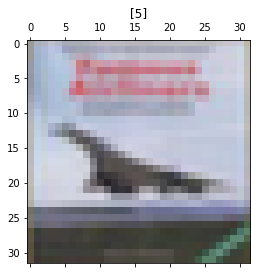

In [116]:
plt.matshow(test_input[3].reshape(32,32,3))
plt.title(val_target[3])
plt.show()

In [119]:
import PIL.Image as pilimg

In [139]:
image = pilimg.open('cat.jpg')
pix = np.array(image)

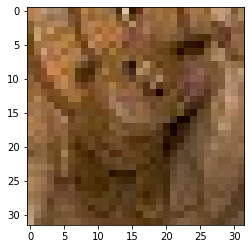

In [140]:
plt.imshow(pix)
plt.show()

In [135]:
np.round(model.predict((pix/255.0).reshape(-1,32,32,3)))

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [133]:
model.predict(test_input[3].reshape(-1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([[0.73191786, 0.0115861 , 0.02918736, 0.00284423, 0.01427042,
        0.00088742, 0.00165001, 0.00180508, 0.19686642, 0.00898515]],
      dtype=float32)

In [137]:
image1 = pilimg.open('airplane.jpg')
pix1 = np.array(image1)

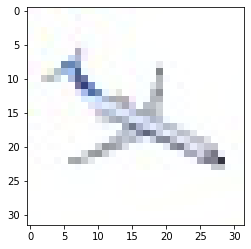

In [138]:
plt.imshow(pix1)
plt.show()

In [141]:
np.round(model.predict((pix1/255.0).reshape(-1,32,32,3)))

1/1 [==============================] - 0s 17ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)